In [ ]:
!pip install kagglehub

# Downloading Kaggle Dataset

In [200]:
%load_ext autoreload
%autoreload 2
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

# print("Path to dataset files:", path)

In [ ]:
# Download to default location
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
print("Downloaded to:", path)

# Create data directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Move files to your desired location (cut, not copy)
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), f"./data/{file}")
    
print("Files moved to ./data/")

# Optionally, remove the empty download directory
try:
    os.rmdir(path)
    print("Cleaned up empty download directory")
except OSError:
    print("Download directory not empty or couldn't be removed")

100%|██████████| 93.9k/93.9k [00:00<00:00, 467kB/s]

Extracting files...
Downloaded to: /Users/omar/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/8
Files moved to ./data/
Cleaned up empty download directory



# Intial look on the data

In [ ]:
# Load the dataset
df = pd.read_csv('./data/StudentPerformanceFactors.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (6607, 20)

First few rows:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [158]:
# Basic info about the dataset
print("Dataset info:")
df.info()
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
df.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Initial model -> i will improve it but will use this as a benchmark

In [201]:
# Comprehensive regression model using all features


# Create a copy of the dataframe for preprocessing
df_model = df.copy()

# # Handle categorical variables - encode them numerically -> encodes nan values too which is wrong
# label_encoders = {}
# categorical_cols = df_model.select_dtypes(include=['object']).columns
# for col in categorical_cols:
#     if col != 'Exam_Score':  # Don't encode the target if it's categorical -> extra
#         le = LabelEncoder()
#         df_model[col] = le.fit_transform(df_model[col])
#         label_encoders[col] = le

# Handle categorical variables using the custom function
df_model = encode_categorical_features(df_model)

# Prepare features (all columns except target)
feature_cols = [col for col in df_model.columns if col != 'Exam_Score']
X_all = df_model[feature_cols]
y = df_model['Exam_Score']

print(f"Using {len(feature_cols)} features:")
print(feature_cols)

Encoded Parental_Involvement
Encoded Access_to_Resources
Encoded Motivation_Level
Encoded Family_Income
Encoded Teacher_Quality
Encoded Parental_Education_Level
Encoded Distance_from_Home
Encoded Peer_Influence
Encoded Extracurricular_Activities
Encoded Internet_Access
Encoded School_Type
Encoded Learning_Disabilities
Encoded Gender

Encoding completed!
Categorical columns encoded: 13
Using 19 features:
['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [202]:
# we need to either drop or fill NaN values before training
# we will drop rows with NaN values for simplicity
print("Initial shape of features:", X_all.shape)

X_all = X_all.dropna()
y = y[X_all.index]  # Align target with features

print("Shape of features after NaN handling:", X_all.shape)

Initial shape of features: (6607, 19)
Shape of features after NaN handling: (6378, 19)


In [203]:
initial_model = train_and_evaluate_model(X_all, y)    


Linear Results:
R² Score: 0.7327
RMSE: 2.0379
MAE: 0.4813

Ridge Results:
R² Score: 0.7327
RMSE: 2.0379
MAE: 0.4814

Random Forest Results:
R² Score: 0.6286
RMSE: 2.4024
MAE: 1.1336

XGBoost Results:
R² Score: 0.6375
RMSE: 2.3734
MAE: 0.9992

🏆 Best Model: Ridge (R² = 0.7327)


# Data analysis -> we need to do analysis to see which features need changes

# 1-encode categorical columns

In [204]:
# Usage:
df_1 = df.copy()
df_encoded = encode_categorical_features(df_1)

# Check the result
print("\nFirst 5 rows after encoding:")
print(df_encoded.head())

# Check data types
print("\nData types after encoding:")
categorical_cols = ['Gender', 'Teacher_Quality', 'School_Type', 'Parental_Education_Level', 'Distance_from_Home']
for col in categorical_cols:
    if col in df_encoded.columns:
        print(f"{col}: {df_encoded[col].dtype} - Unique values: {sorted(df_encoded[col].dropna().unique())}")

Encoded Parental_Involvement
Encoded Access_to_Resources
Encoded Motivation_Level
Encoded Family_Income
Encoded Teacher_Quality
Encoded Parental_Education_Level
Encoded Distance_from_Home
Encoded Peer_Influence
Encoded Extracurricular_Activities
Encoded Internet_Access
Encoded School_Type
Encoded Learning_Disabilities
Encoded Gender

Encoding completed!
Categorical columns encoded: 13

First 5 rows after encoding:
   Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     1                    3   
1             19          64                     1                    2   
2             24          98                     2                    2   
3             29          89                     1                    2   
4             19          92                     2                    2   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7        

In [205]:
#first we need to split ot train and test sets
df_train, df_test = train_test_split(df_encoded, test_size=0.2, random_state=42)

# 2-Duplicate data

In [206]:
# Check for duplicates
print(f"\nDuplicate rows in train: {df_train.duplicated().sum()}")
print(f"\nDuplicate rows in test: {df_test.duplicated().sum()}")


Duplicate rows in train: 0

Duplicate rows in test: 0


# 3-Missing Data

In [207]:
# Check for missing values
print(f"Missing values in train: {df_train.isnull().sum()}")
print(f"Missing values in test: {df_test.isnull().sum()}")

Missing values in train: Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               60
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      69
Distance_from_Home            51
Gender                         0
Exam_Score                     0
dtype: int64
Missing values in test: Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Acces

In [208]:
df_train = fill_missing_values(df_train)

df_test = fill_missing_values(df_test)

Missing values before filling:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               60
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      69
Distance_from_Home            51
Gender                         0
Exam_Score                     0
dtype: int64
Filled Teacher_Quality missing values with median: 2.0
Filled Parental_Education_Level missing values with median: 2.0
Filled Distance_from_Home missing values with median: 1.0

Missing values after filling:
Hours_Studied                 0
Attendance                    0
Parental_Involvement    

/Users/omar/Desktop/omar/Elevvo-ML-intern/Task1-Student Score Prediction/Student-Score-Prediction-elevvo/functions.py:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  print(f"Filled {col} missing values with mode: {mode_value}")
/Users/omar/Desktop/omar/Elevvo-ML-intern/Task1-Student Score Prediction/Student-Score-Prediction-elevvo/functions.py:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inp

In [209]:
#verification
print(f"Missing values in train: {df_train.isnull().sum()}")
print(f"Missing values in test: {df_test.isnull().sum()}")

Missing values in train: Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64
Missing values in test: Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_S

# 3.2: Build a model to test

In [210]:
# re build the model to check if this was better than simply dropping the rows with NaN values
second_model = train_and_evaluate_model(df_train[feature_cols], df_train['Exam_Score'])


Linear Results:
R² Score: 0.7086
RMSE: 2.0509
MAE: 0.5059

Ridge Results:
R² Score: 0.7086
RMSE: 2.0509
MAE: 0.5059

Random Forest Results:
R² Score: 0.6186
RMSE: 2.3461
MAE: 1.1181

XGBoost Results:
R² Score: 0.6101
RMSE: 2.3722
MAE: 1.0362

🏆 Best Model: Linear (R² = 0.7086)


In [211]:
# this model is worse than the first one, i have tried adding the mdoe and median values to the model, but it didn't help
# so i will simply drop the rows with NaN values

# Drop rows with NaN values in the original dataset
df_dropped = df.copy()
df_dropped = df_dropped.dropna()
df_dropped = encode_categorical_features(df_dropped)

Encoded Parental_Involvement
Encoded Access_to_Resources
Encoded Motivation_Level
Encoded Family_Income
Encoded Teacher_Quality
Encoded Parental_Education_Level
Encoded Distance_from_Home
Encoded Peer_Influence
Encoded Extracurricular_Activities
Encoded Internet_Access
Encoded School_Type
Encoded Learning_Disabilities
Encoded Gender

Encoding completed!
Categorical columns encoded: 13


In [213]:
third_model = train_and_evaluate_model(df_dropped[feature_cols], df_dropped['Exam_Score'])


Linear Results:
R² Score: 0.7327
RMSE: 2.0379
MAE: 0.4813

Ridge Results:
R² Score: 0.7327
RMSE: 2.0379
MAE: 0.4814

Random Forest Results:
R² Score: 0.6286
RMSE: 2.4024
MAE: 1.1336

XGBoost Results:
R² Score: 0.6375
RMSE: 2.3734
MAE: 0.9992

🏆 Best Model: Ridge (R² = 0.7327)


# 4-Data visualization -> so we can see patterns and decide how we can change the features

In [214]:
#recombine the train and test sets for analysis
# df_combined = pd.concat([df_train, df_test], ignore_index=True)

df_combined = df_dropped.copy()

# 4.1-Distribution of the exam scores (desired output)

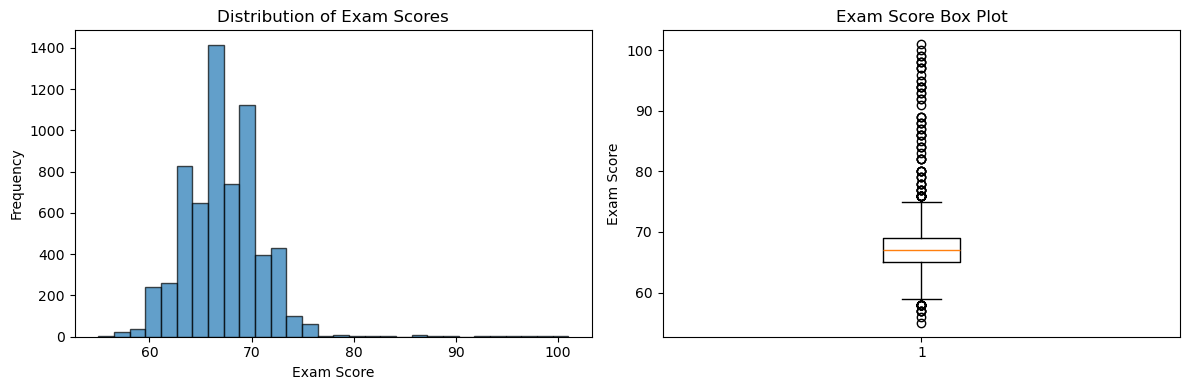

Exam Score Statistics:
Mean: 67.25
Median: 67.00
Std: 3.91
Range: 55 - 101


In [215]:
# Distribution of exam scores
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_combined['Exam_Score'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')

plt.subplot(1, 2, 2)
plt.boxplot(df_combined['Exam_Score'])
plt.ylabel('Exam Score')
plt.title('Exam Score Box Plot')

plt.tight_layout()
plt.show()

# Basic stats
print(f"Exam Score Statistics:")
print(f"Mean: {df_combined['Exam_Score'].mean():.2f}")
print(f"Median: {df_combined['Exam_Score'].median():.2f}")
print(f"Std: {df_combined['Exam_Score'].std():.2f}")
print(f"Range: {df_combined['Exam_Score'].min()} - {df_train['Exam_Score'].max()}")

# 4.2-Heat map

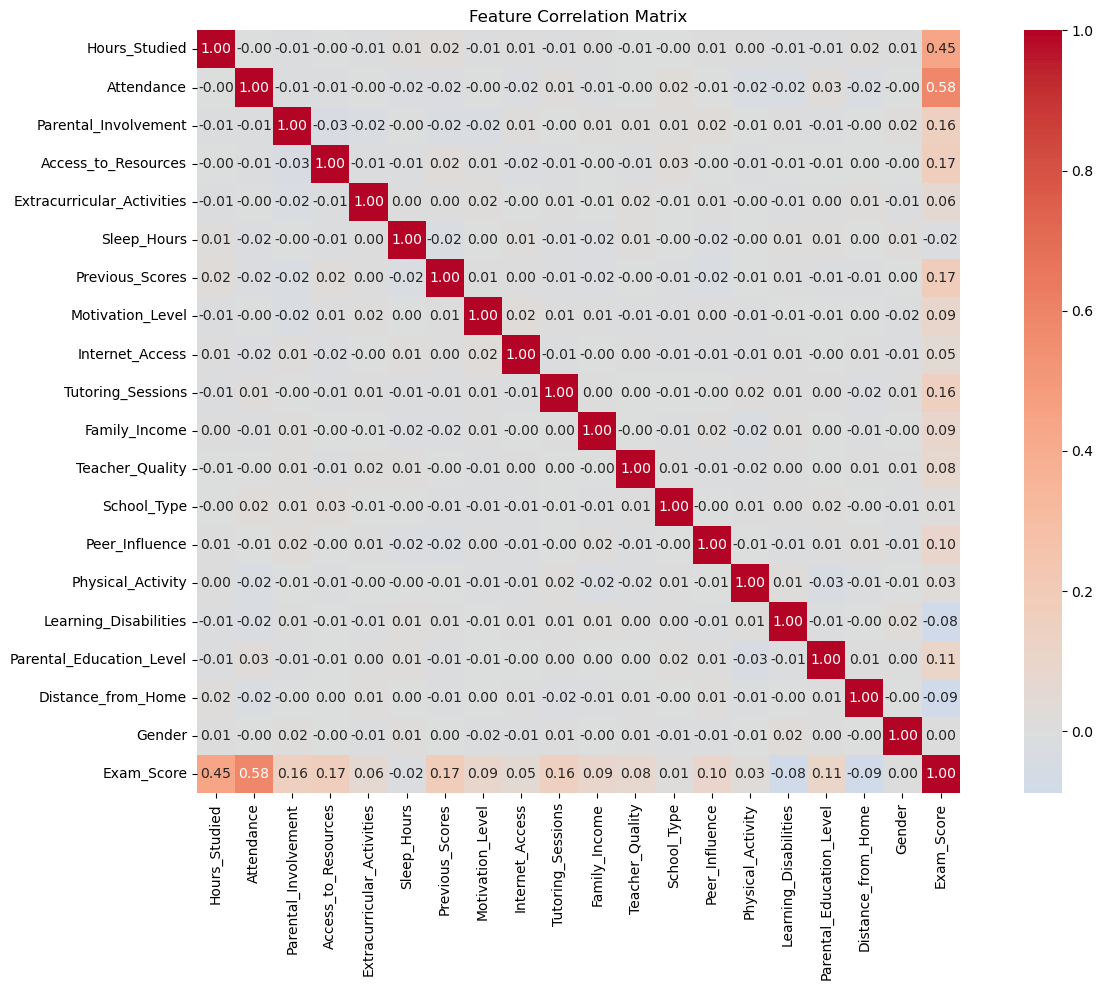

Top 10 features correlated with Exam Score:
Exam_Score                  1.000000
Attendance                  0.580259
Hours_Studied               0.445104
Previous_Scores             0.174283
Access_to_Resources         0.167856
Tutoring_Sessions           0.156829
Parental_Involvement        0.156014
Parental_Education_Level    0.105253
Peer_Influence              0.099133
Family_Income               0.094555
Name: Exam_Score, dtype: float64


In [216]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = df_combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Top correlations with target
exam_correlations = correlation_matrix['Exam_Score'].abs().sort_values(ascending=False)
print("Top 10 features correlated with Exam Score:")
print(exam_correlations.head(10))

# 4.3- each col vs exam scores

Exam Score Categories:
Very Low: 55-64
Low: 65-69
Medium: 70-74
High: 75-84
Very High: 85-101

Score distribution across 5 categories:
Score_Category
Very Low     1396
Low          3401
Medium       1457
High           89
Very High      35
Name: count, dtype: int64

FEATURE DISTRIBUTION ANALYSIS (5 Categories)


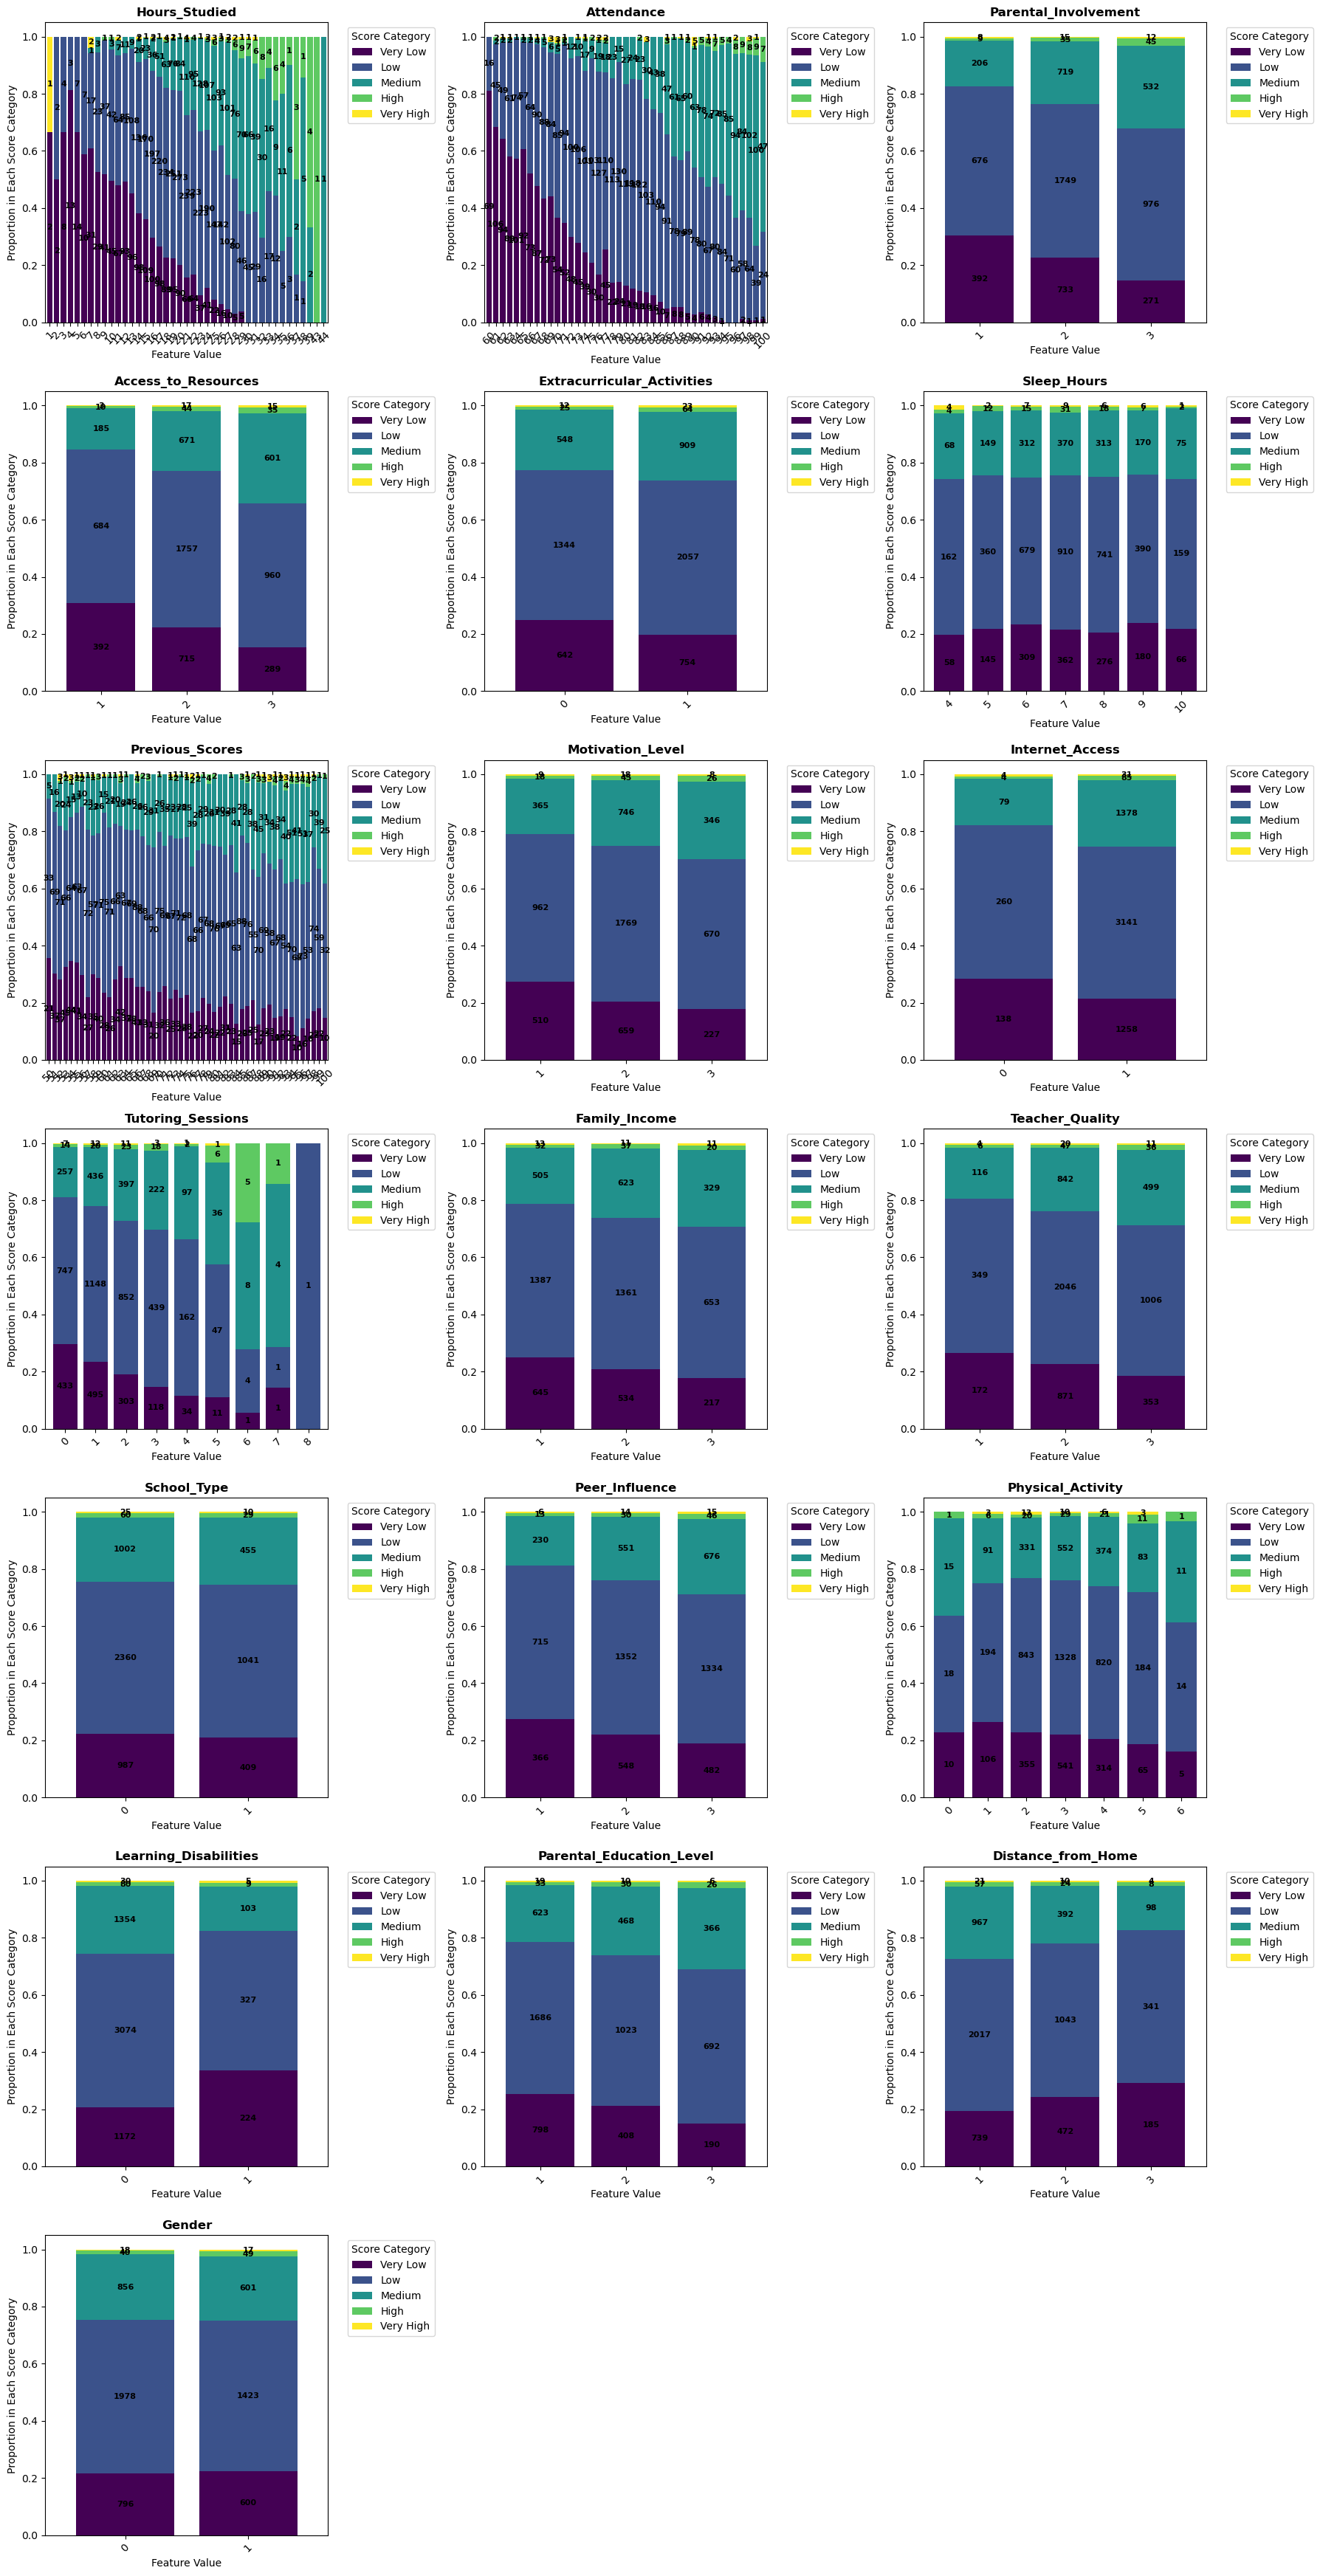

In [217]:
# Create 5 exam score categories and analyze feature distributions
import matplotlib.pyplot as plt
import numpy as np

# Create analysis dataframe
df_analysis = df_combined.copy()

# Create 5 categories based on your score range (55-101)
# Very Low: 55-64, Low: 65-69, Medium: 70-74, High: 75-84, Very High: 85-101
df_analysis['Score_Category'] = pd.cut(df_analysis['Exam_Score'], 
                                      bins=[54, 64, 69, 74, 84, 102], 
                                      labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

print("Exam Score Categories:")
print("Very Low: 55-64")
print("Low: 65-69") 
print("Medium: 70-74")
print("High: 75-84")
print("Very High: 85-101")

print(f"\nScore distribution across 5 categories:")
category_counts = df_analysis['Score_Category'].value_counts().sort_index()
print(category_counts)

# Get all feature columns
feature_cols = [col for col in df_analysis.columns if col not in ['Exam_Score', 'Score_Category']]

# Create comprehensive analysis for each feature
print("\n" + "="*100)
print("FEATURE DISTRIBUTION ANALYSIS (5 Categories)")
print("="*100)

# Set up plotting
n_features = len(feature_cols)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

plt.figure(figsize=(18, 5 * n_rows))

for idx, feature in enumerate(feature_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    
    # Create crosstab showing feature values vs score categories
    crosstab = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'])
    crosstab_pct = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'], normalize='index')
    
    # Create clean stacked bar chart
    crosstab_pct.plot(kind='bar', ax=plt.gca(), stacked=True, 
                      colormap='viridis', width=0.8)
    plt.title(f'{feature}', fontsize=12, fontweight='bold')
    plt.xlabel('Feature Value', fontsize=10)
    plt.ylabel('Proportion in Each Score Category', fontsize=10)
    plt.legend(title='Score Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    
    # Add count annotations on bars (commented out for cleaner look)
    for i, feature_value in enumerate(crosstab.index):
        y_offset = 0
        for j, score_cat in enumerate(crosstab.columns):
            count = crosstab.loc[feature_value, score_cat]
            if count > 0:
                pct = crosstab_pct.loc[feature_value, score_cat]
                plt.text(i, y_offset + pct/2, str(count), 
                        ha='center', va='center', fontsize=8, fontweight='bold')
                y_offset += pct

plt.tight_layout()
plt.show()

In [218]:
# Detailed text analysis for each feature
print("\n" + "="*80)
print("DETAILED BREAKDOWN BY FEATURE")
print("="*80)

# First, let's analyze the distribution of discrimination scores to set better thresholds
print("\n" + "="*80)
print("DATA-DRIVEN THRESHOLD ANALYSIS")
print("="*80)

discrimination_scores = []
for feature in feature_cols:
    crosstab_pct = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'], normalize='index')
    variances = [crosstab_pct.loc[fv].var() for fv in crosstab_pct.index]
    avg_variance = np.mean(variances)
    discrimination_scores.append(avg_variance)

print("📊 Discrimination Score Statistics:")
print(f"Min: {np.min(discrimination_scores):.4f}")
print(f"25th percentile: {np.percentile(discrimination_scores, 25):.4f}")
print(f"Median: {np.median(discrimination_scores):.4f}")
print(f"75th percentile: {np.percentile(discrimination_scores, 75):.4f}")
print(f"Max: {np.max(discrimination_scores):.4f}")
print(f"Mean: {np.mean(discrimination_scores):.4f}")
print(f"Std: {np.std(discrimination_scores):.4f}")

# Data-driven thresholds (using percentiles)
weak_threshold = np.percentile(discrimination_scores, 33)  # Bottom 33%
keep_threshold = np.percentile(discrimination_scores, 67)  # Top 33%

print(f"\n🎯 SUGGESTED DATA-DRIVEN THRESHOLDS:")
print(f"❌ REMOVE: < {weak_threshold:.4f} (bottom 33%)")
print(f"🟡 WEAK: {weak_threshold:.4f} - {keep_threshold:.4f} (middle 33%)")
print(f"✅ KEEP: > {keep_threshold:.4f} (top 33%)")

print(f"\n📋 COMPARISON WITH CURRENT THRESHOLDS:")
print(f"Current: REMOVE < 0.01, WEAK 0.01-0.05, KEEP > 0.05")
print(f"Data-driven: REMOVE < {weak_threshold:.4f}, WEAK {weak_threshold:.4f}-{keep_threshold:.4f}, KEEP > {keep_threshold:.4f}")

# Let's use the data-driven thresholds for analysis
print("\n" + "="*80)
print("DETAILED BREAKDOWN BY FEATURE (Using Data-Driven Thresholds)")
print("="*80)

# Show detailed analysis for first 5 features, then summary for all
for feature in feature_cols[:5]:  # Show first 5 features in detail
    print(f"\n{'='*20} {feature} {'='*20}")
    
    # Raw counts
    crosstab = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'])
    print("Raw Counts:")
    print(crosstab)
    
    # Percentages within each feature value
    crosstab_pct = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'], normalize='index')
    print(f"\nPercentages (how each {feature} value distributes across score categories):")
    print((crosstab_pct * 100).round(1))
    
    # Calculate discrimination score
    variances = []
    for feature_value in crosstab_pct.index:
        variance = crosstab_pct.loc[feature_value].var()
        variances.append(variance)
    
    avg_variance = np.mean(variances)
    
    # Use data-driven thresholds
    if avg_variance < weak_threshold:
        decision = "❌ REMOVE (poor discrimination)"
    elif avg_variance < keep_threshold:
        decision = "🟡 WEAK (some discrimination)"
    else:
        decision = "✅ KEEP (good discrimination)"
    
    print(f"\nDiscrimination Score: {avg_variance:.4f} - {decision}")

# Summary table for all features using both threshold systems
print(f"\n" + "="*90)
print("COMPARISON: ORIGINAL vs DATA-DRIVEN THRESHOLDS")
print("="*90)

results_original = []
results_data_driven = []

for feature in feature_cols:
    crosstab_pct = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'], normalize='index')
    variances = [crosstab_pct.loc[fv].var() for fv in crosstab_pct.index]
    avg_variance = np.mean(variances)
    
    # Original thresholds
    if avg_variance < 0.01:
        decision_orig = "❌ REMOVE"
    elif avg_variance < 0.05:
        decision_orig = "🟡 WEAK"
    else:
        decision_orig = "✅ KEEP"
    
    # Data-driven thresholds
    if avg_variance < weak_threshold:
        decision_data = "❌ REMOVE"
    elif avg_variance < keep_threshold:
        decision_data = "🟡 WEAK"
    else:
        decision_data = "✅ KEEP"
    
    results_original.append({
        'Feature': feature,
        'Discrimination_Score': avg_variance,
        'Original_Decision': decision_orig,
        'DataDriven_Decision': decision_data,
        'Agreement': '✅' if decision_orig == decision_data else '❌'
    })

results_comparison = pd.DataFrame(results_original).sort_values('Discrimination_Score', ascending=False)
print(results_comparison.to_string(index=False))

# Final recommendations using data-driven thresholds
remove_features_dd = results_comparison[results_comparison['DataDriven_Decision'] == '❌ REMOVE']['Feature'].tolist()
weak_features_dd = results_comparison[results_comparison['DataDriven_Decision'] == '🟡 WEAK']['Feature'].tolist()
keep_features_dd = results_comparison[results_comparison['DataDriven_Decision'] == '✅ KEEP']['Feature'].tolist()

print(f"\n🎯 FINAL RECOMMENDATIONS (Data-Driven Thresholds):")
print(f"✅ KEEP: {len(keep_features_dd)} features - {keep_features_dd}")
print(f"🟡 WEAK: {len(weak_features_dd)} features - {weak_features_dd}")
print(f"❌ REMOVE: {len(remove_features_dd)} features - {remove_features_dd}")

# Cross-validation with correlation analysis
print(f"\n🔍 CORRELATION VALIDATION:")
print("Features recommended to KEEP should have higher correlations with Exam_Score")
correlation_matrix_subset = correlation_matrix['Exam_Score'].abs()

if keep_features_dd:
    keep_corrs = [correlation_matrix_subset[f] for f in keep_features_dd]
    print(f"KEEP features avg correlation: {np.mean(keep_corrs):.3f}")

if weak_features_dd:
    weak_corrs = [correlation_matrix_subset[f] for f in weak_features_dd]
    print(f"WEAK features avg correlation: {np.mean(weak_corrs):.3f}")

if remove_features_dd:
    remove_corrs = [correlation_matrix_subset[f] for f in remove_features_dd]
    print(f"REMOVE features avg correlation: {np.mean(remove_corrs):.3f}")

print(f"\n💡 THRESHOLD RECOMMENDATION:")
agreement_rate = (results_comparison['Agreement'] == '✅').mean()
print(f"Agreement between original and data-driven: {agreement_rate:.1%}")

if agreement_rate > 0.7:
    print("✅ Original thresholds are reasonable - stick with them")
else:
    print("🔄 Consider using data-driven thresholds for better feature selection")


DETAILED BREAKDOWN BY FEATURE

DATA-DRIVEN THRESHOLD ANALYSIS
📊 Discrimination Score Statistics:
Min: 0.0426
25th percentile: 0.0462
Median: 0.0471
75th percentile: 0.0478
Max: 0.0747
Mean: 0.0503
Std: 0.0088

🎯 SUGGESTED DATA-DRIVEN THRESHOLDS:
❌ REMOVE: < 0.0463 (bottom 33%)
🟡 WEAK: 0.0463 - 0.0475 (middle 33%)
✅ KEEP: > 0.0475 (top 33%)

📋 COMPARISON WITH CURRENT THRESHOLDS:
Current: REMOVE < 0.01, WEAK 0.01-0.05, KEEP > 0.05
Data-driven: REMOVE < 0.0463, WEAK 0.0463-0.0475, KEEP > 0.0475

DETAILED BREAKDOWN BY FEATURE (Using Data-Driven Thresholds)

==================== Hours_Studied ====================
Raw Counts:
Score_Category  Very Low  Low  Medium  High  Very High
Hours_Studied                                         
1                      2    0       0     0          1
2                      2    2       0     0          0
3                      8    4       0     0          0
4                     13    3       0     0          0
5                     14    7       0    

In [ ]:
# we will remove the cols that are not recommended to keep# Remove features with poor discrimination scores
# features_to_remove = [
#     'Extracurricular_Activities',
#     'Motivation_Level', 
#     'Sleep_Hours',
#     'Gender',
#     'Learning_Disabilities',
#     'Physical_Activity'
# ]

features_to_remove = [
    # 'Extracurricular_Activities',
    'Gender'
]

# features_to_remove = [

# ]

# Make copies of the datasets
df_combined_filtered = df_combined.copy()
# Print before
print(f"Before removal - Columns: {df_combined.shape[1]}")

# Drop the features
df_combined_filtered = df_combined_filtered.drop(columns=features_to_remove)

# Print after
print(f"After removal - Columns: {df_combined_filtered.shape[1]}")
print(f"Features removed: {len(features_to_remove)}")


Before removal - Columns: 20
After removal - Columns: 18
Features removed: 2


# 5- Model building

In [222]:
feature_cols = [col for col in df_combined_filtered.columns if col != 'Exam_Score']
fourth_model = train_and_evaluate_model(df_combined_filtered[feature_cols], df_combined_filtered['Exam_Score'])


Linear Results:
R² Score: 0.7281
RMSE: 2.0554
MAE: 0.5418

Ridge Results:
R² Score: 0.7281
RMSE: 2.0554
MAE: 0.5418

Random Forest Results:
R² Score: 0.6294
RMSE: 2.3999
MAE: 1.1308

XGBoost Results:
R² Score: 0.6122
RMSE: 2.4548
MAE: 1.0721

🏆 Best Model: Ridge (R² = 0.7281)


## DRAFT

In [80]:
# Let's try a better missing value strategy - using MODE instead of MEDIAN for ordinal data
print(f"\n5. TESTING IMPROVED MISSING VALUE STRATEGY:")

def fill_missing_values_improved(df):
    """
    Fill missing values with MODE (most frequent value) for ordinal categorical data
    """
    df_filled = df.copy()
    
    missing_cols = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
    
    for col in missing_cols:
        if col in df_filled.columns and df_filled[col].isnull().sum() > 0:
            # Use mode (most frequent value) instead of median for ordinal data
            mode_value = df_filled[col].mode()[0]
            df_filled[col].fillna(mode_value, inplace=True)
            print(f"Filled {col} missing values with mode: {mode_value}")
    
    return df_filled

# Apply improved missing value strategy
df_encoded_improved = fill_missing_values_improved(df_encoded)

# Split and train model with improved strategy
feature_cols_improved = [col for col in df_encoded_improved.columns if col != 'Exam_Score']
X_improved = df_encoded_improved[feature_cols_improved]
y_improved = df_encoded_improved['Exam_Score']

X_train_improved, X_test_improved, y_train_improved, y_test_improved = train_test_split(
    X_improved, y_improved, test_size=0.2, random_state=42
)

model_improved = LinearRegression()
model_improved.fit(X_train_improved, y_train_improved)
y_pred_improved = model_improved.predict(X_test_improved)

r2_improved = r2_score(y_test_improved, y_pred_improved)
rmse_improved = np.sqrt(mean_squared_error(y_test_improved, y_pred_improved))
mae_improved = mean_absolute_error(y_test_improved, y_pred_improved)

print(f"\n6. FINAL COMPARISON - ALL MISSING VALUE STRATEGIES:")
print(f"{'Strategy':<35} {'R² Score':<12} {'RMSE':<12} {'MAE':<12}")
print("-" * 70)
print(f"{'Original benchmark':<35} {r2_all:<12.4f} {rmse_all:<12.4f} {mae_all:<12.4f}")

if 'r2_dropna' in locals():
    print(f"{'Drop missing rows':<35} {r2_dropna:<12.4f} {rmse_dropna:<12.4f} {mae_dropna:<12.4f}")

print(f"{'Mode imputation (improved)':<35} {r2_improved:<12.4f} {rmse_improved:<12.4f} {mae_improved:<12.4f}")

# Find best strategy
strategies = {
    'Original (median fill)': r2_all,
    'Mode imputation': r2_improved
}

if 'r2_dropna' in locals():
    strategies['Drop missing rows'] = r2_dropna

best_strategy = max(strategies.items(), key=lambda x: x[1])
print(f"\n🏆 BEST STRATEGY: {best_strategy[0]} with R² = {best_strategy[1]:.4f}")

# If mode imputation is better, update our main dataset
if r2_improved > r2_all:
    print(f"\n✅ Using improved missing value strategy going forward")
    print(f"📈 Performance improvement: {r2_improved - r2_all:.4f} R² increase")
    
    # Update the main combined dataset
    df_combined_best = df_encoded_improved.copy()
    
    print(f"\n💡 RECOMMENDATION: Replace your df_combined with mode-imputed data")
else:
    print(f"\n📊 Current median strategy is still best")
    df_combined_best = df_combined.copy()


5. TESTING IMPROVED MISSING VALUE STRATEGY:
Filled Teacher_Quality missing values with mode: 2.0
Filled Parental_Education_Level missing values with mode: 1.0
Filled Distance_from_Home missing values with mode: 1.0

6. FINAL COMPARISON - ALL MISSING VALUE STRATEGIES:
Strategy                            R² Score     RMSE         MAE         
----------------------------------------------------------------------
Original benchmark                  0.6886       2.0979       1.0157      
Drop missing rows                   0.7327       2.0379       0.4813      
Mode imputation (improved)          0.7709       1.7994       0.4443      

🏆 BEST STRATEGY: Mode imputation with R² = 0.7709

✅ Using improved missing value strategy going forward
📈 Performance improvement: 0.0823 R² increase

💡 RECOMMENDATION: Replace your df_combined with mode-imputed data


/var/folders/77/n_9rqs5n2hq31dqwm43rln840000gn/T/ipykernel_73767/1241308171.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(mode_value, inplace=True)


In [ ]:
# Detailed text analysis for each feature
# print("\n" + "="*80)
# print("DETAILED BREAKDOWN BY FEATURE")
# print("="*80)

# # for feature in feature_cols[:5]:  # Show first 5 features in detail
# for feature in feature_cols:  # Show all features in detail
#     print(f"\n{'='*20} {feature} {'='*20}")
    
#     # Raw counts
#     crosstab = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'])
#     print("Raw Counts:")
#     print(crosstab)
    
#     # Percentages within each feature value
#     crosstab_pct = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'], normalize='index')
#     print(f"\nPercentages (how each {feature} value distributes across score categories):")
#     print((crosstab_pct * 100).round(1))
    
#     # Calculate discrimination score
#     variances = []
#     for feature_value in crosstab_pct.index:
#         variance = crosstab_pct.loc[feature_value].var()
#         variances.append(variance)
    
#     avg_variance = np.mean(variances)
    
#     if avg_variance < 0.01:
#         decision = "❌ REMOVE (poor discrimination)"
#     elif avg_variance < 0.05:
#         decision = "🟡 WEAK (some discrimination)"
#     else:
#         decision = "✅ KEEP (good discrimination)"
    
#     print(f"\nDiscrimination Score: {avg_variance:.4f} - {decision}")

# # Summary table for all features
# print(f"\n" + "="*60)
# print("SUMMARY: ALL FEATURES DISCRIMINATION ANALYSIS")
# print("="*60)

# results = []
# for feature in feature_cols:
#     crosstab_pct = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'], normalize='index')
#     variances = [crosstab_pct.loc[fv].var() for fv in crosstab_pct.index]
#     avg_variance = np.mean(variances)
    
#     if avg_variance < 0.01:
#         decision = "❌ REMOVE"
#     elif avg_variance < 0.05:
#         decision = "🟡 WEAK"
#     else:
#         decision = "✅ KEEP"
    
#     results.append({
#         'Feature': feature,
#         'Unique_Values': df_analysis[feature].nunique(),
#         'Discrimination_Score': avg_variance,
#         'Decision': decision
#     })

# results_df = pd.DataFrame(results).sort_values('Discrimination_Score', ascending=False)
# print(results_df.to_string(index=False))

# # Final recommendations
# remove_features = results_df[results_df['Decision'] == '❌ REMOVE']['Feature'].tolist()
# weak_features = results_df[results_df['Decision'] == '🟡 WEAK']['Feature'].tolist()
# keep_features = results_df[results_df['Decision'] == '✅ KEEP']['Feature'].tolist()

# print(f"\n🎯 FINAL RECOMMENDATIONS:")
# print(f"✅ KEEP: {len(keep_features)} features")
# print(f"🟡 WEAK: {len(weak_features)} features") 
# print(f"❌ REMOVE: {len(remove_features)} features")

# if remove_features:
#     print(f"\n🗑️ Features to remove: {remove_features}")

/var/folders/77/n_9rqs5n2hq31dqwm43rln840000gn/T/ipykernel_73767/2417402630.py:55: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/77/n_9rqs5n2hq31dqwm43rln840000gn/T/ipykernel_73767/2417402630.py:55: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


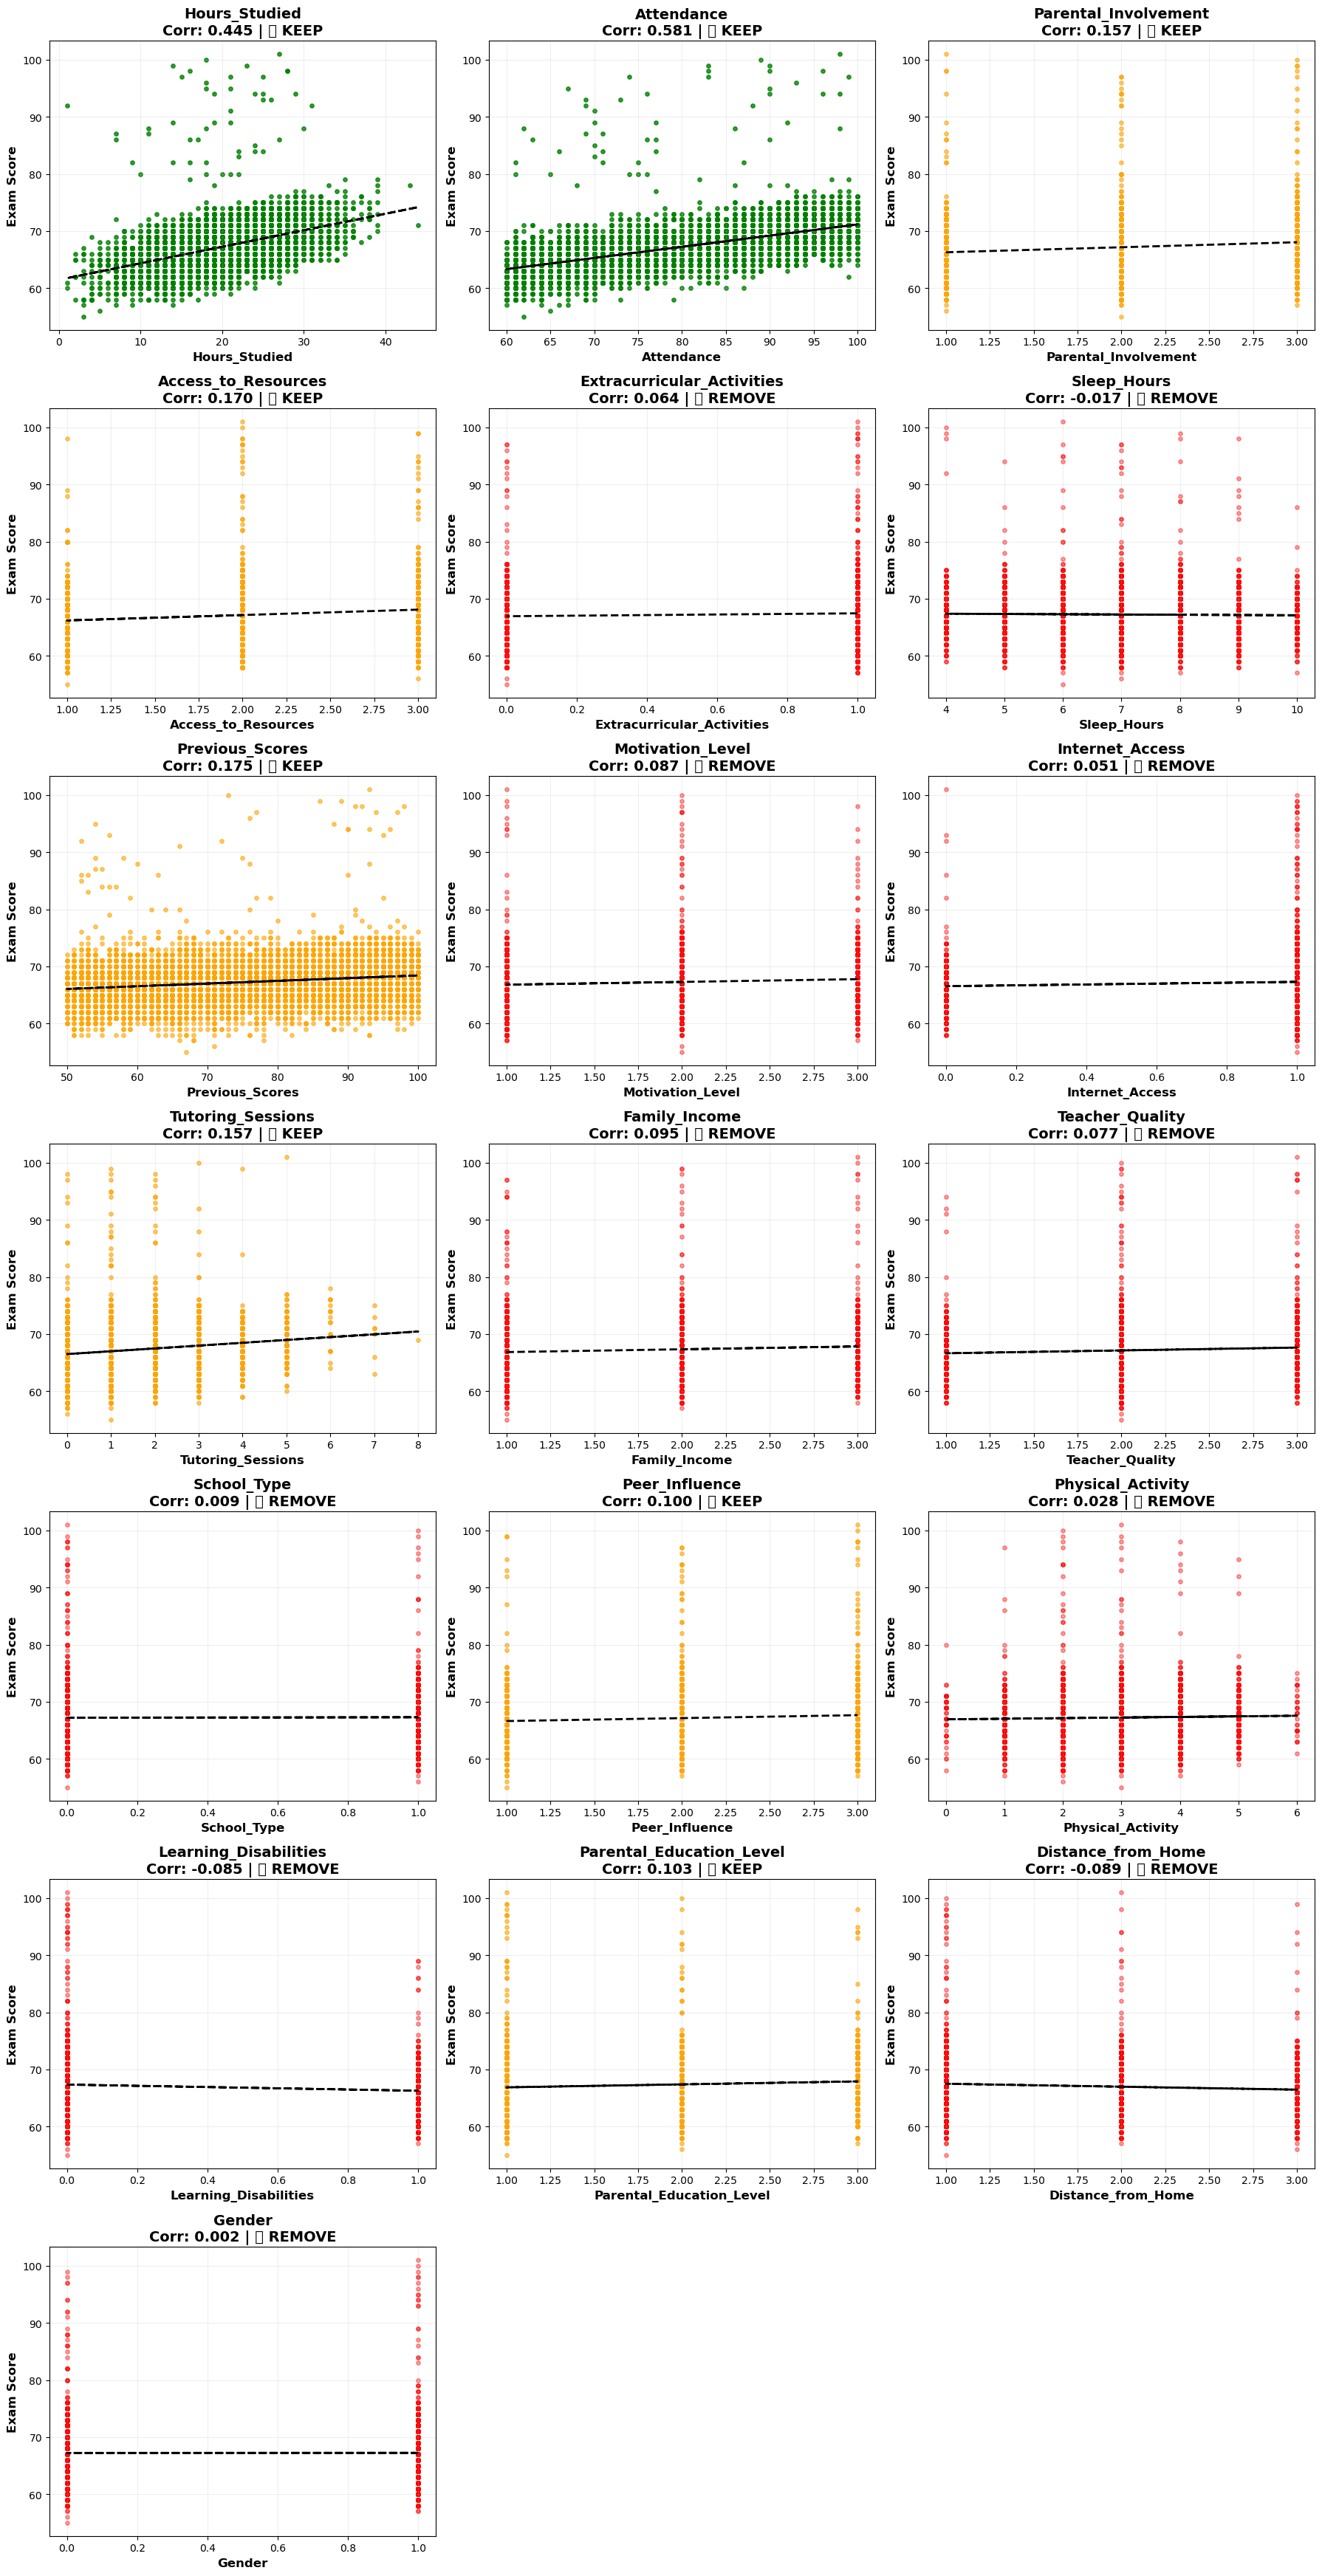


📊 VISUAL DECISION SUMMARY
Hours_Studied             |  0.445 | 🟢 STRONG     | ✅ KEEP
Attendance                |  0.581 | 🟢 STRONG     | ✅ KEEP
Parental_Involvement      |  0.157 | 🟡 MODERATE   | ✅ KEEP
Access_to_Resources       |  0.170 | 🟡 MODERATE   | ✅ KEEP
Extracurricular_Activities |  0.064 | 🔴 WEAK       | ❌ REMOVE
Sleep_Hours               | -0.017 | 🔴 WEAK       | ❌ REMOVE
Previous_Scores           |  0.175 | 🟡 MODERATE   | ✅ KEEP
Motivation_Level          |  0.087 | 🔴 WEAK       | ❌ REMOVE
Internet_Access           |  0.051 | 🔴 WEAK       | ❌ REMOVE
Tutoring_Sessions         |  0.157 | 🟡 MODERATE   | ✅ KEEP
Family_Income             |  0.095 | 🔴 WEAK       | ❌ REMOVE
Teacher_Quality           |  0.077 | 🔴 WEAK       | ❌ REMOVE
School_Type               |  0.009 | 🔴 WEAK       | ❌ REMOVE
Peer_Influence            |  0.100 | 🟡 MODERATE   | ✅ KEEP
Physical_Activity         |  0.028 | 🔴 WEAK       | ❌ REMOVE
Learning_Disabilities     | -0.085 | 🔴 WEAK       | ❌ REMOVE
Parental_E

In [67]:
# Create super simple and visual plots for easy decision making
import matplotlib.pyplot as plt
import numpy as np

# Get all feature columns (exclude target)
feature_cols = [col for col in df_combined.columns if col != 'Exam_Score']

# Set up the plotting parameters
n_cols = 3  # Number of columns in subplot grid
n_rows = len(feature_cols) // n_cols + (len(feature_cols) % n_cols > 0)

# Create a large figure with bigger plots
plt.figure(figsize=(18, 5 * n_rows))

# Loop through each feature and create simple, clear plots
for i, feature in enumerate(feature_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Get correlation value
    corr_value = correlation_matrix.loc[feature, 'Exam_Score']
    
    # Choose color based on correlation strength
    if abs(corr_value) >= 0.3:
        color = 'green'      # Strong correlation
        alpha = 0.8
    elif abs(corr_value) >= 0.1:
        color = 'orange'     # Moderate correlation  
        alpha = 0.6
    else:
        color = 'red'        # Weak correlation
        alpha = 0.4
    
    # Simple scatter plot with bigger points
    plt.scatter(df_combined[feature], df_combined['Exam_Score'], 
               color=color, alpha=alpha, s=15)
    
    # Add trend line to make pattern clearer
    z = np.polyfit(df_combined[feature], df_combined['Exam_Score'], 1)
    p = np.poly1d(z)
    plt.plot(df_combined[feature], p(df_combined[feature]), 
             color='black', linestyle='--', linewidth=2)
    
    # Clear labels and title
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Exam Score', fontsize=12, fontweight='bold')
    
    # Big, clear title with decision
    decision = "✅ KEEP" if abs(corr_value) >= 0.1 else "❌ REMOVE"
    plt.title(f'{feature}\nCorr: {corr_value:.3f} | {decision}', 
             fontsize=14, fontweight='bold')
    
    # Clean grid
    plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Super clear summary table
print("\n" + "="*70)
print("📊 VISUAL DECISION SUMMARY")
print("="*70)

keep_features = []
remove_features = []

for feature in feature_cols:
    corr_value = correlation_matrix.loc[feature, 'Exam_Score']
    
    if abs(corr_value) >= 0.1:
        decision = "✅ KEEP"
        keep_features.append(feature)
        strength = "🟢 STRONG" if abs(corr_value) >= 0.3 else "🟡 MODERATE"
    else:
        decision = "❌ REMOVE"
        remove_features.append(feature)
        strength = "🔴 WEAK"
    
    print(f"{feature:25} | {corr_value:6.3f} | {strength:12} | {decision}")

print(f"\n🎯 FINAL DECISION:")
print(f"✅ KEEP:   {len(keep_features)} features")
print(f"❌ REMOVE: {len(remove_features)} features")

if remove_features:
    print(f"\n🗑️  Features to remove: {', '.join(remove_features)}")

In [ ]:
plt.tight_layout()plt.show()# Detailed text analysis for each featureprint("\n" + "="*80)print("DETAILED BREAKDOWN BY FEATURE")print("="*80)for feature in feature_cols[:5]:  # Show first 5 features in detail    print(f"\n{'='*20} {feature} {'='*20}")        # Raw counts    crosstab = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'])    print("Raw Counts:")    print(crosstab)        # Percentages within each feature value    crosstab_pct = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'], normalize='index')    print(f"\nPercentages (how each {feature} value distributes across score categories):")    print((crosstab_pct * 100).round(1))        # Calculate discrimination score    variances = []    for feature_value in crosstab_pct.index:        variance = crosstab_pct.loc[feature_value].var()        variances.append(variance)    avg_variance = np.mean(variances)        if avg_variance < 0.01:        decision = "❌ REMOVE (poor discrimination)"    elif avg_variance < 0.05:        decision = "🟡 WEAK (some discrimination)"    else:        decision = "✅ KEEP (good discrimination)"        print(f"\nDiscrimination Score: {avg_variance:.4f} - {decision}")# Summary table for all featuresprint(f"\n" + "="*60)print("SUMMARY: ALL FEATURES DISCRIMINATION ANALYSIS")print("="*60)results = []for feature in feature_cols:    crosstab_pct = pd.crosstab(df_analysis[feature], df_analysis['Score_Category'], normalize='index')    variances = [crosstab_pct.loc[fv].var() for fv in crosstab_pct.index]    avg_variance = np.mean(variances)        if avg_variance < 0.01:        decision = "❌ REMOVE"    elif avg_variance < 0.05:        decision = "🟡 WEAK"    else:        decision = "✅ KEEP"        results.append({        'Feature': feature,        'Unique_Values': df_analysis[feature].nunique(),        'Discrimination_Score': avg_variance,        'Decision': decision    })results_df = pd.DataFrame(results).sort_values('Discrimination_Score', ascending=False)print(results_df.to_string(index=False))# Final recommendationsremove_features = results_df[results_df['Decision'] == '❌ REMOVE']['Feature'].tolist()weak_features = results_df[results_df['Decision'] == '🟡 WEAK']['Feature'].tolist()keep_features = results_df[results_df['Decision'] == '✅ KEEP']['Feature'].tolist()print(f"\n🎯 FINAL RECOMMENDATIONS:")print(f"✅ KEEP: {len(keep_features)} features")print(f"🟡 WEAK: {len(weak_features)} features") print(f"❌ REMOVE: {len(remove_features)} features")if remove_features:    print(f"\n🗑️ Features to remove: {remove_features}")